In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import re

In [17]:
# turn document into 

tmp = ['wefaef', 'aefea', 'khkjhjk', 'ajkbaewjmncj', 'asdf', 'asdfadsfsf', 'asdfa', 'aaaa']

In [168]:
# for idx, i in enumerate(tmp): 
#     if len(i) < 5:
#         tmp.pop(idx)
# print tmp

In [19]:
tmp = open('2014 annuals', 'rb')
tmptmp = " ".join(tmp)
print tmptmp[:100]
print type(tmptmp)

 
 UNITED STATES SECURITIES AND EXCHANGE COMMISSION
 Washington, D.C. 20549
 Form 10-K        
  
 �
<type 'str'>


In [20]:
stoplist = set('for a of the and to in'.split())


In [21]:
tmptmp = tmptmp.replace("\n  \n", ". ").strip()
tmptmp = re.sub( '\s+', ' ', tmptmp ).strip()
tmptmp = tmptmp.replace(' .', '.')
tmptmp = tmptmp.replace(' o ', ". ")
# tmptmp[:1000].split('. ')

In [22]:
tmptmp[:1000]

'UNITED STATES SECURITIES AND EXCHANGE COMMISSION Washington, D.C. 20549 Form 10-K. \xc3\xbe ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2014 OR. TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from to Commission File Number 001-00368 Chevron Corporation (Exact name of registrant as specified in its charter) Delaware. 94-0890210. 6001 Bollinger Canyon Road, San Ramon, California 94583-2324 (State or other jurisdiction of incorporation or organization). (I.R.S. Employer Identification No.). (Address of principal executive offices) (Zip Code). Registrant\xe2\x80\x99s telephone number, including area code (925) 842-1000. Securities registered pursuant to Section 12 (b) of the Act:. Title of Each Class. Name of Each Exchange on Which Registered Common stock, par value $.75 per share. New York Stock Exchange, Inc. Indicate by check mark if the re

In [69]:
texts = [word for word in tmptmp.lower().split('. ') if word not in stoplist]
print len(texts), '\n'
print texts[:3]

76259 

['united states securities and exchange commission washington, d.c', '20549 form 10-k', '\xc3\xbe annual report pursuant to section 13 or 15(d) of the securities exchange act of 1934 for the fiscal year ended december 31, 2014 or']


In [70]:
count_dict = {}
for i in texts:
    if len(i.split(" ")) not in count_dict:
        count_dict[len(i.split(" "))] = 0
    else:
        count_dict[len(i.split(" "))] += 1

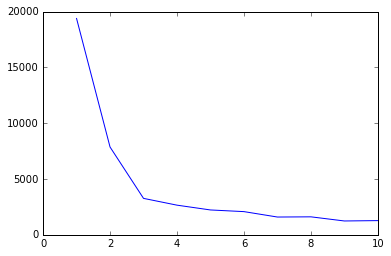

In [71]:
pd.Series(count_dict).plot(xlim=(0,10))

In [72]:
### turn this into a count matrix

In [73]:
for idx, i in enumerate(texts):
    if len(i.split(' ')) > 5:
        texts.pop(idx)

In [74]:
len(texts)

52776

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [132]:
tf = TfidfVectorizer(texts, stop_words='english')

In [134]:
text_tfidf = tf.fit_transform(texts)

In [135]:
cf = CountVectorizer(texts, stop_words='english')

In [157]:
text_counts = cf.fit_transform(texts)

In [142]:
tfidfdf = pd.DataFrame(text_tfidf.todense(), columns=tf.get_feature_names())

In [155]:
tfidfdf.head()

,00,000,0005,000s,001,0017682,002,0025,003,00368,...,zephyros,zero,zinc,zinia,zip,zone,zone4,zones,zoning,ýno
0,0,0,0,0,0.000000,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0.186818,0,0,0,0,0.291182,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0.000000,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0.000000,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0.000000,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [159]:
countdf = pd.DataFrame(text_counts.todense(), columns=tf.get_feature_names())

In [160]:
countdf.head()

,00,000,0005,000s,001,0017682,002,0025,003,00368,...,zephyros,zero,zinc,zinia,zip,zone,zone4,zones,zoning,ýno
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
import cPickle as pickle

In [167]:
### serialize it

pickle.dump(text_tfidf, open('text_tfidf.pkl', 'wb')) 
pickle.dump(text_counts, open('text_counts.pkl', 'wb'))

In [299]:
w1 = ['united states securities and exchange commission washington']
w2 = ['the moon is out today']
w3 = ['text processing is difficult']
w4 = ['tell me something you know about currency']

In [265]:
from scipy import spatial
import numpy as np

In [302]:
### similarity by TFIDF w4 = ['tell me something you know about currencies']
for i in  range(5000):
    tmp = cosine_similarity(tf.transform(w4), countdf.iloc[i].values.reshape(1,-1));



[[ 0.43072146]] 1955


In [312]:
results = [ (cosine_similarity(tf.transform(w4), countdf.iloc[i].values.reshape(1,-1)),i) for i in range(len(countdf)) ]
    

In [322]:
shortlist = sorted(results, reverse=True)[:6]

In [323]:
print w4
for i in shortlist:
    print texts[i[1]], i[0][0], '\n'

['tell me something you know about currency']
foreign currency translation and transactions certain of the company’s subsidiaries use a local currency as their functional currency [ 0.43072146] 

currency translation the u.s [ 0.43072146] 

the functional currency is the currency of the primary economic environment in which the subsidiary operates [ 0.38524898] 

other foreign currency obligations [ 0.3516826] 

foreign currency translation [ 0.3516826] 

foreign currency translation [ 0.3516826] 



In [304]:
### similarity by COUNT w4 = ['tell me something you know about currencies']
for i in  range(25000):
    tmp = cosine_similarity(cf.transform(w4), countdf.iloc[i].values.reshape(1,-1));
    if tmp > 0.4:
        print tmp, i


[[ 0.40824829]] 1590
[[ 0.40824829]] 1832
[[ 0.5]] 1955
[[ 0.40824829]] 1964
[[ 0.4472136]] 6575
[[ 0.40824829]] 7256
[[ 0.40824829]] 7638
[[ 0.40824829]] 7936


In [324]:
count_results = [ (cosine_similarity(cf.transform(w4), countdf.iloc[i].values.reshape(1,-1)),i) for i in range(len(countdf)) ]
    

In [325]:
shortlist = sorted(results, reverse=True)[:6]

In [326]:
print w4
for i in shortlist:
    print texts[i[1]], i[0][0], '\n'

['tell me something you know about currency']
foreign currency translation and transactions certain of the company’s subsidiaries use a local currency as their functional currency [ 0.43072146] 

currency translation the u.s [ 0.43072146] 

the functional currency is the currency of the primary economic environment in which the subsidiary operates [ 0.38524898] 

other foreign currency obligations [ 0.3516826] 

foreign currency translation [ 0.3516826] 

foreign currency translation [ 0.3516826] 



In [171]:
tmp = open('2014 annuals', 'rb')
tmp = " ".join(tmp)
print tmp[:100]

 
 UNITED STATES SECURITIES AND EXCHANGE COMMISSION
 Washington, D.C. 20549
 Form 10-K        
  
 �


In [172]:
cleansent = re.sub('[^A-Za-z]+', ' ', tmp.lower())

In [173]:
sentences = []
for i in cleansent.split(" "):
    if len(i)>3: sentences.append(i)
sentences = " ".join(sentences)

In [174]:
sentences[:400]

'united states securities exchange commission washington form annual report pursuant section securities exchange fiscal year ended december transition report pursuant section securities exchange transition period from commission file number chevron corporation exact name registrant specified charter delaware bollinger canyon road ramon california state other jurisdiction incorporation organization '

In [175]:
with open("multiple_annual_reports_words_only.txt", "wb") as text_file:
    text_file.write(sentences)

In [176]:
import word2vec

In [182]:
word2vec.word2vec('multiple_annual_reports_words_only.txt', 'multiple_output.bin', size=10000, verbose=True, min_count=1)

Starting training using file multiple_annual_reports_words_only.txt
Vocab size: 10407
Words in train file: 614098
Alpha: 0.000785  Progress: 97.20%  Words/thread/sec: 4.61k  

In [183]:
model = word2vec.load('multiple_output.bin')

In [329]:
model.vocab[1:10]

array([u'that', u'with', u'million', u'december', u'from', u'other',
       u'company', u'financial', u'production'], 
      dtype='<U78')

In [350]:
indexes, metrics = model.cosine('currency')
model.generate_response(indexes, metrics, clusters=True)[:10]

rec.array([(u'foreign', 0.9614704542756268), (u'translation', 0.9120724399585932),
 (u'derivatives', 0.8163633730858906), (u'selects', 0.7934954723683507),
 (u'comprehensively', 0.7778535557273641), (u'swaps', 0.7726069268608546),
 (u'unrealized', 0.7685007318655056), (u'gains', 0.7622602428036713),
 (u'denominated', 0.7614773929648497), (u'marketable', 0.7565221621681989)], 
          dtype=[(u'word', '<U78'), (u'metric', '<f8')])

In [330]:
[i[0] for i in model.generate_response(indexes, metrics, clusters=True)[:10]]

[u'foreign',
 u'translation',
 u'derivatives',
 u'selects',
 u'comprehensively',
 u'swaps',
 u'unrealized',
 u'gains',
 u'denominated',
 u'marketable']

In [354]:
listwords={}

def toptensimilars(string):
#     tmp = [[word for word in string.split(" ")] if word not in stoplist]
    tmp = string.lower().split(' ')# if word not in stoplist]
    print tmp
    for i in tmp:
        try:
            indexes, metrics = model.cosine(i)
            listwords[i] = model.generate_response(indexes, metrics, clusters=True)[:10]
        except:
            pass
        


In [355]:
toptensimilars("the currency exchange of last year was unfavorable for us")

['the', 'currency', 'exchange', 'of', 'last', 'year', 'was', 'unfavorable', 'for', 'us']


In [357]:
listwords.keys()

['unfavorable', 'currency', 'year', 'last', 'exchange']